<a href="https://colab.research.google.com/github/dkivrak/LSTM-Based-SMS-Classification/blob/main/turkish_sms_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [211]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [212]:
sms = pd.read_csv('turkish_sms.csv', on_bad_lines='skip' , delimiter=";")

In [213]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4751 entries, 0 to 4750
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Message    4751 non-null   object
 1   Group      4751 non-null   int64 
 2   GroupText  4751 non-null   object
dtypes: int64(1), object(2)
memory usage: 111.5+ KB


In [214]:
sms.head(4)

,Message,Group,GroupText
0,125 lira,2,Normal
1,Baskanin aksam toplantısi fenaymis :),2,Normal
2,Bilal yalçnlara ne zaman gidiyoruz?,2,Normal
3,"BiP ile mesajlarimi aninda, daha eglenceli gon...",1,Spam


In [215]:
sms = sms.drop('GroupText', axis=1)
sms['Group'] = sms['Group'].map({2: 0, 1: 1})

In [216]:
print(sms['Group'].value_counts())
sms.head()  #preprocessing completed

Group
1    2536
0    2215
Name: count, dtype: int64


,Message,Group
0,125 lira,0
1,Baskanin aksam toplantısi fenaymis :),0
2,Bilal yalçnlara ne zaman gidiyoruz?,0
3,"BiP ile mesajlarimi aninda, daha eglenceli gon...",1
4,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR...,1


In [217]:
y=sms['Group'].values
x=sms['Message'].values

In [218]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [219]:
max_words = 10000
max_len = 40

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [220]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train_pad, y_train, validation_data=(x_test_pad, y_test), epochs=12, batch_size=64)

Epoch 1/12


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.6600 - loss: 0.5810 - val_accuracy: 0.9611 - val_loss: 0.1656
Epoch 2/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9882 - loss: 0.0474 - val_accuracy: 0.9895 - val_loss: 0.0240
Epoch 3/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9989 - loss: 0.0091 - val_accuracy: 0.9979 - val_loss: 0.0074
Epoch 4/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9979 - val_loss: 0.0083
Epoch 5/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 1.0000 - loss: 7.1088e-04 - val_accuracy: 0.9979 - val_loss: 0.0086
Epoch 6/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 1.0000 - loss: 4.3642e-04 - val_accuracy: 0.9979 - val_loss: 0.0095
Epoch 7/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 1.0000 - loss: 2.6330e-04 - val_accuracy: 0.9979 - val_loss: 0.0100
Epoch 8/12
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 1.0000 - loss: 1.9056e-04 - val_accuracy: 0.997

In [221]:
loss, accuracy = model.evaluate(x_test_pad, y_test)
print(f'Test accuracy: {accuracy:.3f}')

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9997 - loss: 0.0014    
Test accuracy: 0.998


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


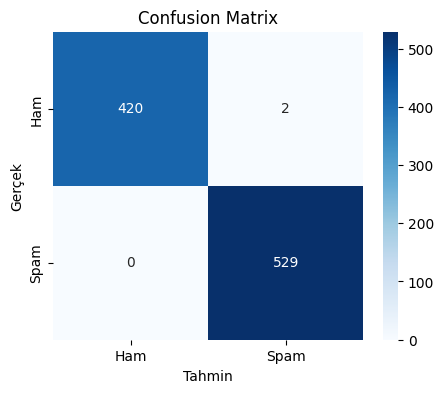

              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00       422
        Spam       1.00      1.00      1.00       529

    accuracy                           1.00       951
   macro avg       1.00      1.00      1.00       951
weighted avg       1.00      1.00      1.00       951



In [222]:
y_pred_prob = model.predict(x_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))
